### Project 1: Sales Data Analysis
#### Goal: Analyze sales trends, revenue, and product performance.
#### Skills Used: Pandas, SQL, Matplotlib/Seaborn
#### Dataset: [Kaggle - Superstore Sales Data](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data)

### Step 1: Load and Explore Data
#### 📌 Technique: Use Pandas to read and understand the dataset.
#### ✅ Key Insights: Identify missing values, column types, and overall structure.

In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("superstore_sales.csv", encoding="latin-1")

In [3]:
# Display first 5 rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [4]:
print(df.shape)

(9994, 21)


In [5]:
# Check dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Check missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Step 2: Data Cleaning
#### 📌 Technique: Handle missing values and remove duplicates.
#### ✅ Key Insights: Ensures clean data for accurate analysis.

In [7]:
# Drop unnecessary columns
df.drop(["Row ID", "Postal Code"], axis=1, inplace=True)

In [8]:
# Fill missing values (if any)
df.fillna(method="ffill", inplace=True)

C:\Users\Zala Sheshang\AppData\Local\Temp\ipykernel_992\990768394.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [9]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [10]:
# Verify changes 1
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
# Verify changes 2
print(df.duplicated().sum())


0


### Step 3: Sales Performance Analysis
#### 📌 Technique: Use SQL-like Pandas operations to analyze revenue trends.
#### ✅ Key Insights: Identifies the most profitable categories and products.

In [12]:
# Total revenue
total_revenue = df["Sales"].sum()
print(f"Total Revenue: ${total_revenue:.4f}")

Total Revenue: $2296919.4883


In [13]:
# Sales by Category
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
print(category_sales)

          Category        Sales
0        Furniture  741718.4233
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [14]:
# Top 10 best-selling products
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


### Step 4: Visualization of Sales Trends
#### 📌 Technique: Use Matplotlib and Seaborn to visualize revenue and product performance.
#### ✅ *Key Insights:* Helps visualize sales patterns and identify seasonal trends.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Zala Sheshang\AppData\Local\Temp\ipykernel_992\3482529554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Sales", data=category_sales, palette="Blues")


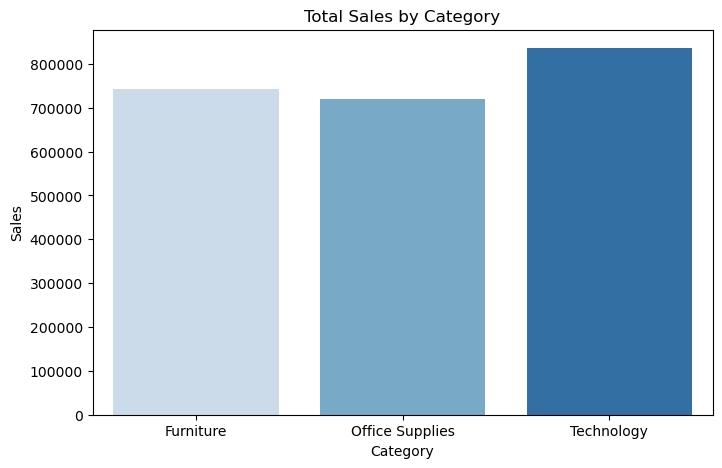

In [16]:
# Bar plot for sales by category
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=category_sales, palette="Blues")
plt.title("Total Sales by Category")
plt.show()

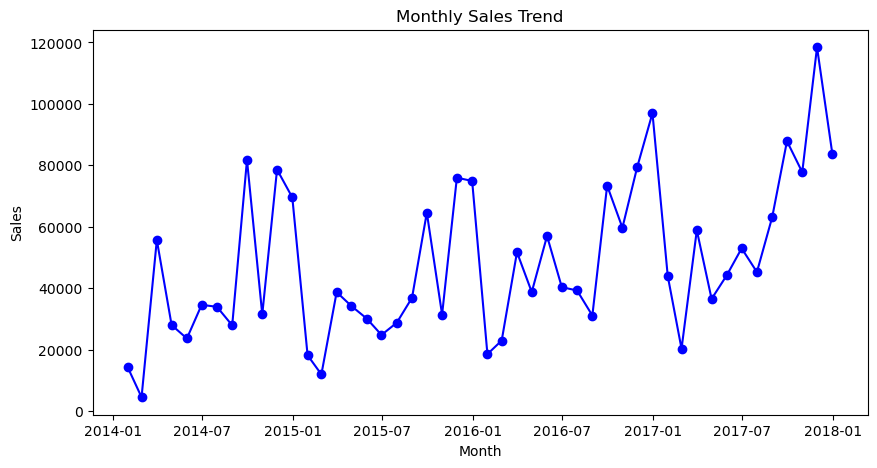

In [17]:
# Line plot for sales over time
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.set_index("Order Date", inplace=True)
monthly_sales = df.resample("ME")["Sales"].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Step 5: SQL Query for Region-Wise Sales
#### 📌 Technique: Use SQLite to run SQL queries inside Python.
#### ✅ Key Insights: Shows regional sales performance

In [18]:
import sqlite3

In [19]:
# Create a database and load data
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

9993

In [20]:
# SQL Query to find sales by region
query = "SELECT Region, SUM(Sales) AS Total_Sales FROM sales GROUP BY Region ORDER BY Total_Sales DESC;"
result = pd.read_sql(query, conn)

print(result)

    Region  Total_Sales
0     West  725457.8245
1     East  678499.8680
2  Central  501239.8908
3    South  391721.9050


### Project Outcome:
#### - Found total revenue and best-performing products.
#### - Identified seasonal sales trends.
#### - Visualized sales by category and region.
#### - Used SQL for in-depth data analysis.
